<a href="https://colab.research.google.com/github/rudrakshnalbalwar/CodeClause-Internships/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [12]:
# Load CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [3]:
# Define the model
model = models.Sequential([
    # First Convolutional Layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # Second Convolutional Layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third Convolutional Layer
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Flatten and Fully Connected Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)  # Output layer with 10 units for 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.5167 - accuracy: 0.4490 - val_loss: 1.2736 - val_accuracy: 0.5400
Epoch 2/10
1563/1563 [==============================] - 71s 45ms/step - loss: 1.1318 - accuracy: 0.6017 - val_loss: 1.0828 - val_accuracy: 0.6245
Epoch 3/10
1563/1563 [==============================] - 66s 43ms/step - loss: 0.9651 - accuracy: 0.6642 - val_loss: 0.9729 - val_accuracy: 0.6630
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8545 - accuracy: 0.7022 - val_loss: 0.8949 - val_accuracy: 0.6877
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7741 - accuracy: 0.7336 - val_loss: 0.8534 - val_accuracy: 0.7095
Epoch 6/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.6997 - accuracy: 0.7584 - val_loss: 0.8872 - val_accuracy: 0.7060
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6480 - accuracy: 0.7752 - val_loss: 0.8748 -

In [10]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')


313/313 - 4s - loss: 0.9082 - accuracy: 0.7181 - 4s/epoch - 14ms/step

Test accuracy: 0.7181000113487244


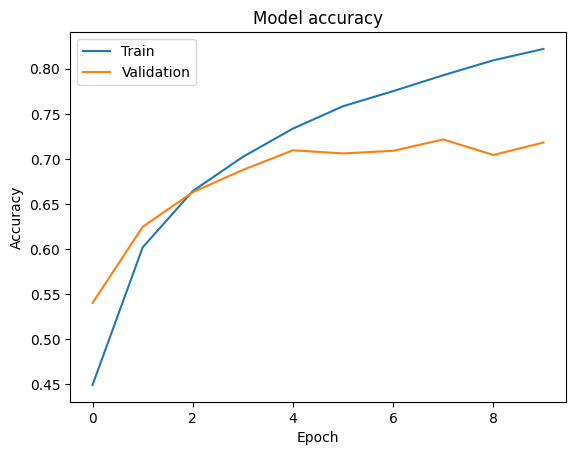

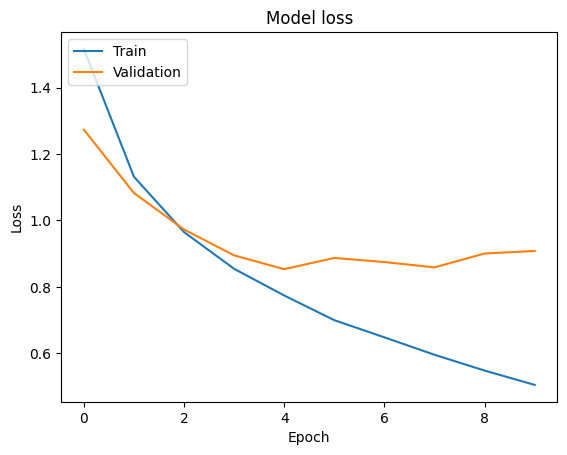

In [11]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
